> **Ex. 4.2.1**: Train a classifier on all of your data and test its accuracy.

>* If your team alliance matrix is `X_ta` and your target array is `y_ta` you can do this by instantiating a model like:
>
        from sklearn.naive_bayes import BernoulliNB
        model = BernoulliNB()
        model.fit(X_ta, y_ta)  # <--- This is the training/fitting/learning step
        
> The `BernoulliNB` is a version of the Naive Bayes classifier which associates certain features with labels and asks what the probability of a label for a data point is given its features. You are free to use any other classifier if you want. Popular ones are trees, random forests, support vector machines, feed forward neural networks, logistic regression, and the list goes on. With `sklearn`, they are just as easy to employ as the `BernoulliNB` classifier.


>1. Test the accuracy of your model. You can use the `.predict` method on the `model` object to get predictions for a matrix of data points. Report the accuracy of your model on the same data that you trained the model on, alongside the baseline accuracy of a "dumb" model that only guesses for the majority class.

>2. Report the precision, recall and F1 scores, with respect to the minority class (heroes). `sklearn` has implementations that you can use if you are short for time. Extra credit for doing it using only basic linear algebra operations with `numpy`, though.

*Hint: If you loaded the alliances/affiliations matrix that I provided, you should make sure to seperate it into feature matrix, `X_ta`, and target array, `y_ta`, before you do anything else.*

In [95]:
# [Answer for Ex. 4.2.1]

import pandas as pd
import random
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn import preprocessing

#pandas.DataFrame

dff = pd.read_csv('train.csv', index_col=0)#usecols = lambda x: x in ["PassengerId", "Survived"])
print dff.keys()
f = pd.read_csv('train.csv',  usecols=lambda x: x not in ["Survived", "Cabin", "Embarked", "Name", "Ticket"])
t = dff['Survived']



f = f.replace("male", 1)
f = f.replace("female", 0)
f = f.fillna(f["Age"].median())


# Dumb model creation -randomly assigns value from 0-1, run once to avoid overwrite
#guess = [random.randint(0,1) for _ in range(len(target))]
#g = [random.randint(0,1) for _ in range(len(t))]

#t = target, f = feature, g = guess, m = model

m = BernoulliNB()
m.fit(f,t)
m.predict(f)

print "Accuracy for training is: %r" %accuracy_score(t, m.predict(f))
#print "Accuracy for guessing is: %r" %accuracy_score(t, g)

'''The recall_score, precision_score, and f1_score return
    an array based on the character type, so the first index
    is the hero, and the second is the villain.'''

print "Recall score for hero is: %r" %recall_score(t, m.predict(f), average=None)[1]
print "Precision score for hero is: %r" %precision_score(t, m.predict(f), average=None)[1]
print "F1 score for hero is: %r" %f1_score(t, m.predict(f), average=None)[1]

Index([u'Survived', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


ValueError: Expected input with 7 features, got 6 instead

### Part 1: Feature representation
In it's raw format, the data cannot be given to a machine learning algorithm. What we must do is extract features from the data and put them into a structured format. This is the same as what we did when we looked at a dog (the data) and extracted into a matrix whether it was fluffy, sad looking, etc. (the features). The feature we will extract here is **team alliances**.

We can represent the team alliances of each character as a row in a matrix where each column corresponds to a particular team. That should look something like this (numbers are made up):

<img src="http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_boa.png" width="400"/>

> **Ex. 4.3.2**: Implement cross validation. The performance of a classifier is strongly dependent on the amount of data it is trained on. In Ex. 4.3.1 you train it on only half of the data and test it on the other half. If you rerun that code multiple times, with random 50/50 partitions, you are gonna see a lot of uncertainty in performance. Cross validation solves this problem by training on a larger subset of the data and testing on a smaller one, and taking the average performance over K-folds of this process.
1. Implement cross validation over $K=10$ folds. For each fold you must record the training and test accuracies. In the end, visualize the distributions of test- and training accuracy as histograms in the same plot. It's important that you comment on the result.

In [79]:
# [Answer to Ex. 4.3.2]

import pandas as pd
import random
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

n_folds = 10
subset = len(f)/n_folds

trainAcc = []
testAcc = []

clf = BernoulliNB()
mdl = BernoulliNB()


for i in range(10):
    #Gets the folds for each cross validation for the feature set
    tempTest = f.values[i*subset:(i+1)*subset]
    tempTrain = np.concatenate([f.values[(i+1)*subset:],f.values[:i*subset]])
    #Gets the folds for each cross validation for the target set
    temp = np.concatenate([t.values[(i+1)*subset:],t.values[:i*subset]])
    valid = t.values[i*subset:(i+1)*subset]
    
    clf.fit(tempTrain,temp)
    clf.predict(tempTrain)
    #appends the training accuracy score
    trainAcc.append(accuracy_score(temp, clf.predict(tempTrain)))
    mdl.fit(tempTest, valid)
    mdl.predict(tempTest)
    #appends the testing accuracy score
    testAcc.append(accuracy_score(valid,clf.predict(tempTest)))

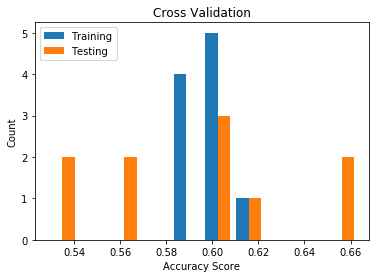

In [80]:
# [Answer to Ex. 4.3.2]

import matplotlib
import matplotlib.pyplot as plt

plt.hist([trainAcc,testAcc],label=['Training','Testing'])
plt.legend(loc='upper left')
plt.title("Cross Validation")
plt.xlabel("Accuracy Score")
plt.ylabel("Count")
plt.show()

>**Ex. 4.4.1**: Let's put our classifier to use!
* Retrain your model on all of your data.
* Create a team alliance representation of the ambiguous characters
* Use the model the estimate the probability that each character is a villain (let's call this *villainness*). You can use the `.predict_proba` method on the model to get probability estimates rather than class assignments.
* **Visualize the "heroness" distribution for all ambiguous characters**. Comment on the result.

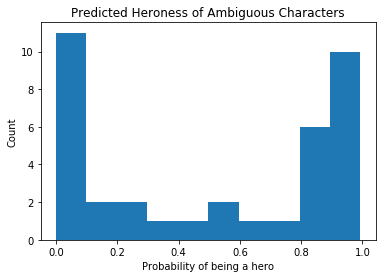

In [59]:
# [Answer to Ex. 4.4.1]

import pandas as pd
import numpy as np
from sklearn.naive_bayes import BernoulliNB
import matplotlib
import matplotlib.pyplot as plt

# Uses the full csv file
df = pd.read_csv('affiliations.csv', index_col=0)

feature = pd.read_csv('affiliations.csv', index_col=0, usecols=lambda x: x not in 'faction')

# Villain = 0, Hero=1, Ambiguous=2
target = df['faction']


model = BernoulliNB()
model.fit(feature,target)
# model.predict_proba(feature)[0] returns probability of hero/villain/ambiguous
# in that order. Use model.predict_proba(feature)[0][1] to get villain probability
model.predict_proba(feature)

ambIndex = []

for thing in range(len(target.keys())):
    if target[thing] == 2:
        ambIndex.append(thing)

ambHeroness = []
for index in ambIndex:
    ambHeroness.append(model.predict_proba(feature)[index][0])

plt.hist(ambHeroness)
plt.title('Predicted Heroness of Ambiguous Characters')
plt.xlabel("Probability of being a hero")
plt.ylabel("Count")
plt.show()

